In [1]:
pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 82 kB 705 kB/s 
     |████████████████████████████████| 9.9 MB 34.5 MB/s 
     |████████████████████████████████| 15.7 MB 57.4 MB/s 
     |████████████████████████████████| 11.2 MB 56.8 MB/s 
     |████████████████████████████████| 61 kB 9.9 MB/s 
     |████████████████████████████████| 944 kB 56.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    

In [1]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
d2l.use_svg_display()

In [2]:
trans = transforms.ToTensor()
celeb_train = torchvision.datasets.CelebA(root="../data",split='train', transform=trans, download=True)
celeb_test = torchvision.datasets.CelebA(root="../data", split='test', transform=trans, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [69]:
len(celeb_train), len(celeb_test)

(162770, 19962)

In [70]:
celeb_train[0][0].size()

torch.Size([3, 218, 178])

In [71]:
celeb_train

Dataset CelebA
    Number of datapoints: 162770
    Root location: ../data
    Target type: ['attr']
    Split: train
    StandardTransform
Transform: ToTensor()

In [72]:
# 총 40개의 label이 CelebA에 존재한다.
# 그리고 각각의 label은 맞으면 0 틀리면 1이다.
# 택한 label은 Attractive으로 3번째 위치에 있다.
len('5_o_Clock_Shadow Arched_Eyebrows Attractive Bags_Under_Eyes Bald Bangs Big_Lips Big_Nose Black_Hair Blond_Hair Blurry Brown_Hair Bushy_Eyebrows Chubby Double_Chin Eyeglasses Goatee Gray_Hair Heavy_Makeup High_Cheekbones Male Mouth_Slightly_Open Mustache Narrow_Eyes No_Beard Oval_Face Pale_Skin Pointy_Nose Receding_Hairline Rosy_Cheeks Sideburns Smiling Straight_Hair Wavy_Hair Wearing_Earrings Wearing_Hat Wearing_Lipstick Wearing_Necklace Wearing_Necktie Young '.split())

40

In [104]:
def get_labels(labels):
  text_labels = 'Attractive NOT_Attractive'.split() #2, Attractive label은 Attractive하다면 1, 하지않다면 0이므로 다음과 같이 표현하였다.
  return [text_labels[int(i)] for i in labels]

In [93]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
  """Plot a list of images."""
  figsize = (num_cols * scale, num_rows * scale)
  _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
  axes = axes.flatten()
  for i, (ax, img) in enumerate(zip(axes, imgs)):
    if torch.is_tensor(img):
      # Tensor Image
      ax.imshow(img.numpy())
    else:
      # PIL Image
      ax.imshow(img)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if titles:
      ax.set_title(titles[i], fontsize=7)
  return axes

In [105]:
len(y[:,0])

18

In [106]:
y[:,2]

tensor([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

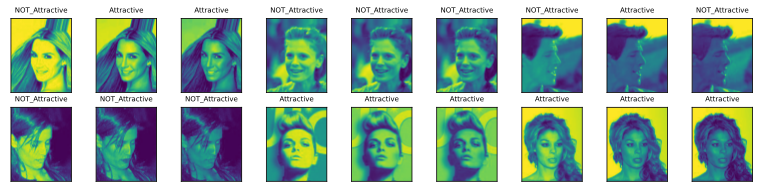

In [107]:
X, y = next(iter(data.DataLoader(celeb_train, batch_size=18)))
show_images(X.reshape(54, 218, 178), 2, 9, titles=get_labels(y[:,2]));

# 2

In [108]:
import torch
from IPython import display
from d2l import torch as d2l

In [109]:
batch_size = 256
def get_dataloader_workers():
  return 4
train_iter = data.DataLoader(celeb_train, batch_size, shuffle=True, num_workers=get_dataloader_workers())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [110]:
from tqdm import tqdm

In [111]:
timer = d2l.Timer()
for X, y in tqdm(train_iter):
  continue
f'{timer.stop():.2f} sec'

  0%|          | 0/636 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 636/636 [03:04<00:00,  3.44it/s]


'184.69 sec'

In [112]:
def load_data_celebA(batch_size, resize=None):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    celeb_train = torchvision.datasets.CelebA(root="../data",split='train', transform=trans, download=True)
    celeb_test = torchvision.datasets.CelebA(root="../data", split='test', transform=trans, download=True)
    return (data.DataLoader(celeb_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
            data.DataLoader(celeb_test, batch_size, shuffle=False, num_workers=get_dataloader_workers()))

In [20]:
train_iter, test_iter = load_data_celebA(32)
for X, y in tqdm(train_iter):
  print(X.shape, X.dtype, y.shape, y.dtype)
  break

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/5087 [00:00<?, ?it/s]

torch.Size([32, 3, 218, 178]) torch.float32 torch.Size([32, 40]) torch.int64


In [ ]:
#

In [154]:
num_inputs = 3*218*178 # picture_size가 3*218*178
num_outputs = 2 # label이 ATTRACTIVE , NOT_ATTRACTIVE 이렇게 두개
W = torch.normal(0, 0.02, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [155]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
print(X.sum(0, keepdim=True))
print(X.sum(1, keepdim=True))

tensor([[5., 7., 9.]])
tensor([[ 6.],
        [15.]])


In [156]:
# softmax function
def softmax(X):
  X_exp = torch.exp(X)
  partition = X_exp.sum(1, keepdim=True)
  return X_exp / partition

X = torch.normal(mean=0, std=1, size=(2, 5))
X_prob = softmax(X)
print(X_prob)
print(X_prob.sum(1))

tensor([[0.1464, 0.0464, 0.1463, 0.3589, 0.3019],
        [0.5013, 0.0179, 0.1092, 0.1982, 0.1735]])
tensor([1.0000, 1.0000])


In [157]:
# softmax regression model
def net(X):
  return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

In [158]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
print(y_hat)
print(y_hat[[0, 1], y]) # [(0,0) (1,2)]

tensor([[0.1000, 0.3000, 0.6000],
        [0.3000, 0.2000, 0.5000]])
tensor([0.1000, 0.5000])


In [159]:
# cross_entropy
def cross_entropy(y_hat, y):
  return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [160]:
# accuracy
def accuracy(y_hat, y):
  """Compute the number of correct predictions."""
  if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
    y_hat = y_hat.argmax(axis=1)
  cmp = y_hat.type(y.dtype) == y
  return float(cmp.type(y.dtype).sum())

accuracy(y_hat, y) / len(y)

0.5

In [161]:
class Accumulator:
  """For accumulating sums over `n` variables."""
  def __init__(self, n):
    self.data = [0.0] * n
  def add(self, *args):
    self.data = [a + float(b) for a, b in zip(self.data, args)]
  def reset(self):
    self.data = [0.0] * len(self.data)
  def __getitem__(self, idx):
    return self.data[idx]

In [116]:
train_iter

In [117]:
def evaluate_accuracy(net, data_iter):
  """Compute the accuracy for a model on a dataset."""
  if isinstance(net, torch.nn.Module):
    net.eval() # Set the model to evaluation mode
  metric = Accumulator(2) # No. of correct predictions, no. of predictions
  with torch.no_grad():
    for X, y in data_iter:
      metric.add(accuracy(net(X), y[:,2]), y[:,2].numel())
  return metric[0] / metric[1]

evaluate_accuracy(net, train_iter)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.48621981937703507

In [67]:
y

tensor([0, 2])

# Training

In [162]:
def train_epoch_ch3(net, train_iter, loss, updater):
  """The training loop defined in Chapter 3."""
  # Set the model to training mode
  if isinstance(net, torch.nn.Module):
    net.train()
  # Sum of training loss, sum of training accuracy, no. of examples
  metric = Accumulator(3)
  for X, y in train_iter:
    # Compute gradients and update parameters
    y_hat = net(X)
    l = loss(y_hat, y[:,2]) # Attracitve label에 대해서만 loss 계산한다.
    if isinstance(updater, torch.optim.Optimizer):
      # Using PyTorch in-built optimizer & loss criterion
      updater.zero_grad()
      l.mean().backward()
      updater.step()
    else:
      # Using custom built optimizer & loss criterion
      l.sum().backward()
      updater(X.shape[0])
    metric.add(float(l.sum()), accuracy(y_hat, y[:,2]), y[:,2].numel()) # Attracitve label에 대해서만 한다.
  # Return training loss and training accuracy
  return metric[0] / metric[2], metric[1] / metric[2]

In [163]:
class Animator:
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)
    
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    """Train a model (defined in Chapter 3)."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.15, 0.75],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in tqdm(range(num_epochs)):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    # assert train_loss < 0.5, train_loss
    # assert train_acc <= 1 and train_acc > 0.7, train_acc
    # assert test_acc <= 1 and test_acc > 0.7, test_acc

100%|██████████| 3/3 [12:50<00:00, 256.75s/it]


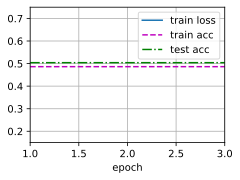

In [164]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

num_inputs = 3*218*178 # picture_size가 3*218*178
num_outputs = 2 # label이 ATTRACTIVE , NOT_ATTRACTIVE 이렇게 두개가 존재한다.
W = torch.normal(0, 0.02, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

num_epochs = 3
train_iter, test_iter = load_data_celebA(32)

train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater) # 개선이 거의되지 않는다.

100%|██████████| 10/10 [45:48<00:00, 274.82s/it]


AssertionError: ignored

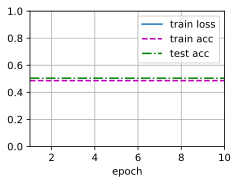

In [125]:
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

num_inputs = 3*218*178 # picture_size가 3*218*178
num_outputs = 2 # label이 ATTRACTIVE , NOT_ATTRACTIVE 이렇게 두개가 존재한다.
W = torch.normal(0, 0.02, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

num_epochs = 10
train_iter, test_iter = load_data_celebA(32)

train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


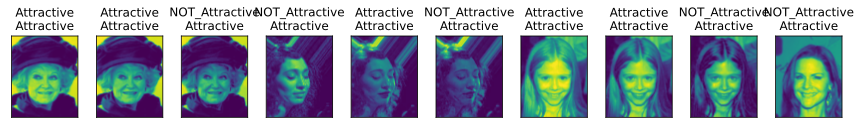

In [138]:
def predict_ch3(net, test_iter, n=10):
    """Predict labels (defined in Chapter 3)."""
    for X, y in test_iter:
        break
    trues = get_labels(y[:,2])
    preds = get_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(X[0:n].reshape((3*n, 218, 178)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

In [139]:
import torch
from torch import nn
from d2l import torch as d2l

In [142]:
batch_size = 256
train_iter, test_iter = load_data_celebA(batch_size)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [146]:
net = nn.Sequential(nn.Flatten(), nn.Linear(3*218*178, 2))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

In [149]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    """Train a model (defined in Chapter 3)."""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.4, 0.8],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    # assert train_loss < 0.5, train_loss
    # assert train_acc <= 1 and train_acc > 0.7, train_acc
    # assert test_acc <= 1 and test_acc > 0.7, test_acc

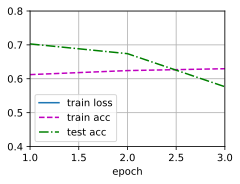

In [150]:
loss = nn.CrossEntropyLoss(reduction='none')
lr=0.1
trainer = torch.optim.SGD(net.parameters(), lr=lr)
num_epochs = 3 # 데이터가 너무 커서 시간이 많이 걸리는 이유로 epoch 수를 줄였습니다.
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)